<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/EnergyConsumptionDataset/train_energy_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/EnergyConsumptionDataset/test_energy_data.csv')

In [3]:
print(df_train.head())
print(df_train.info())
print(df_train.describe())
print(df_train.isnull().sum())

  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building 

In [4]:
building_types = df_train['Building Type'].unique()
days = df_train['Day of Week'].unique()
print(f'{building_types}\n{days}')

['Residential' 'Commercial' 'Industrial']
['Weekday' 'Weekend']


In [5]:
df_train['Building Type']=df_train['Building Type'].str.strip().str.lower().map({'residential':0,'commercial':1,'industrial':2})
df_train['Day of Week']=df_train['Day of Week'].str.strip().str.lower().map({'weekday':0,'weekend':1})
df_test['Building Type']=df_test['Building Type'].str.strip().str.lower().map({'residential':0,'commercial':1,'industrial':2})
df_test['Day of Week']=df_test['Day of Week'].str.strip().str.lower().map({'weekday':0,'weekend':1})

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

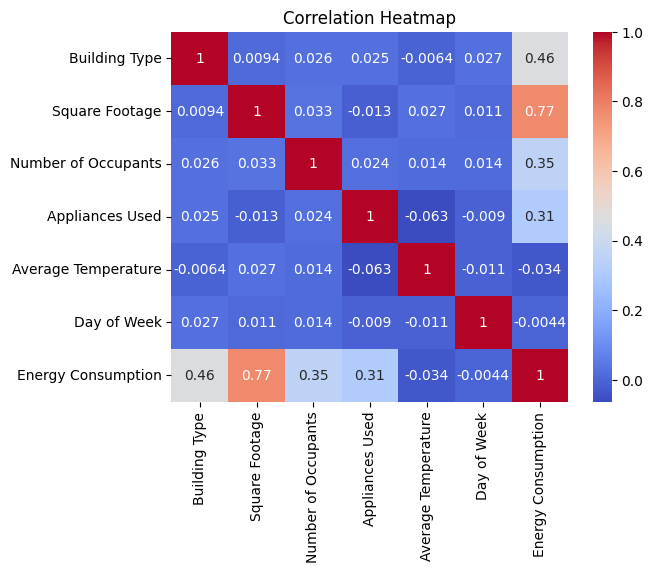

In [7]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
train_data = df_train.drop(['Average Temperature', 'Day of Week'], axis=1)
test_data = df_train.drop(['Average Temperature', 'Day of Week'], axis=1)

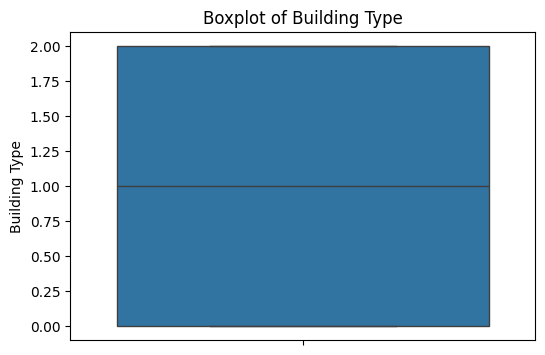

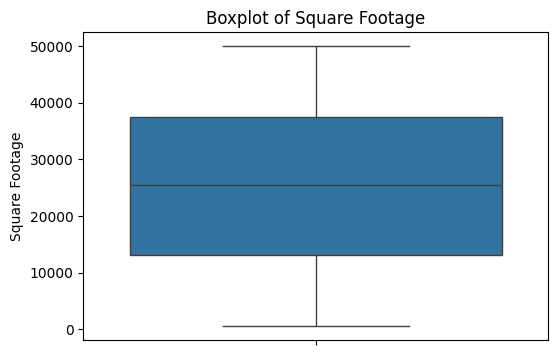

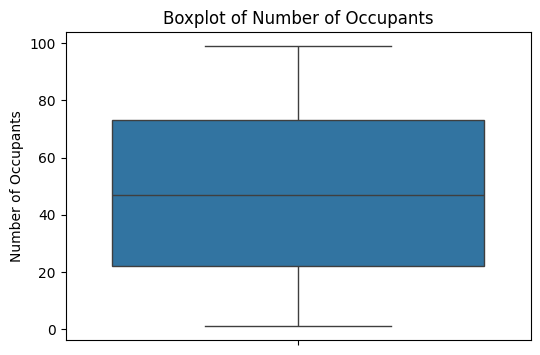

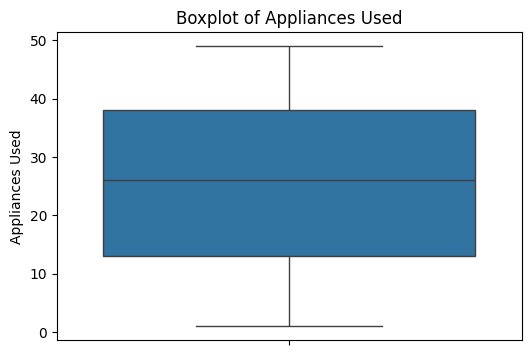

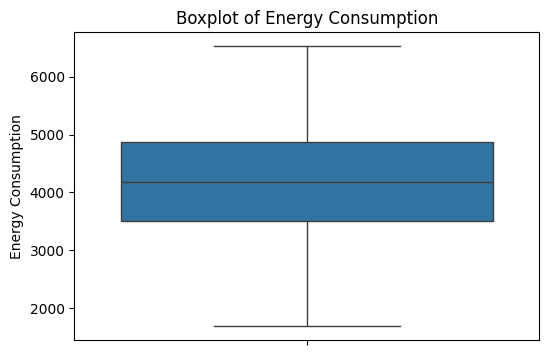

In [9]:
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=train_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

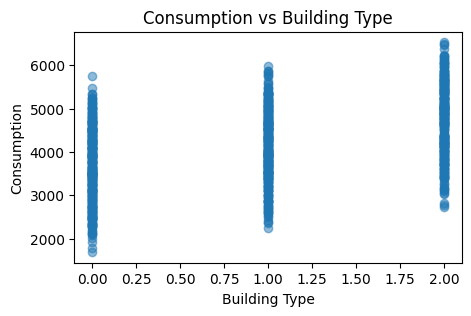

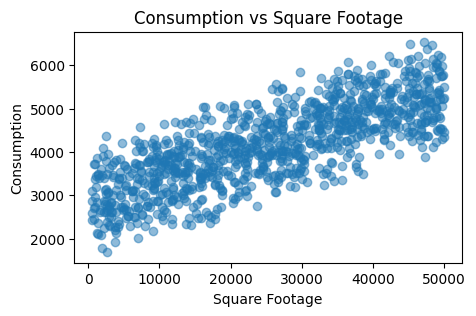

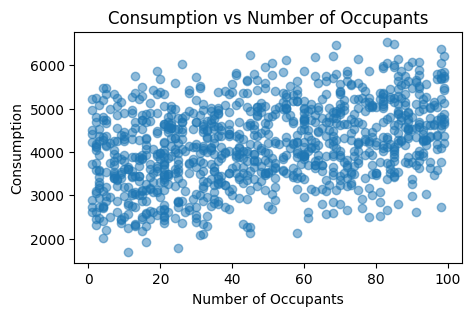

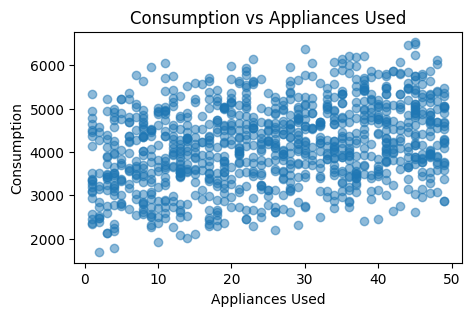

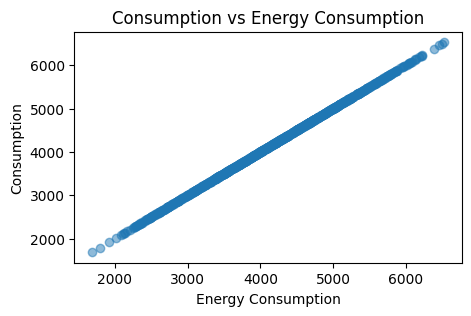

In [10]:
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize=(5, 3))
  plt.scatter(train_data[column], train_data['Energy Consumption'], alpha=0.5)
  plt.xlabel(column)
  plt.ylabel('Consumption')
  plt.title(f'Consumption vs {column}')
  plt.show()

In [16]:
X_train = train_data.drop('Energy Consumption',axis = 1)
y_train = train_data['Energy Consumption']
X_test = test_data.drop('Energy Consumption',axis = 1)
y_test = test_data['Energy Consumption']

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
prediction = model.predict(X_test)
prediction

array([2723.94699076, 5692.19320697, 4083.80079346, 3040.84921158,
       3201.36099242, 4681.92961031, 5539.16290886, 4117.86232027,
       5770.13428597, 3428.88059458, 4284.46695693, 5198.27913987,
       4020.34462994, 2572.49109019, 5051.92300074, 3876.10342341,
       3353.21122749, 5700.48731893, 3566.2408338 , 3112.88264532,
       4910.63425017, 4779.06054157, 4085.86354367, 3975.41477963,
       4416.93129773, 4829.80451462, 3370.11955592, 5759.50941605,
       3553.74519706, 3488.16922125, 4160.14114734, 4691.13876963,
       3981.24559887, 4157.60142682, 2176.0121426 , 4413.45678941,
       2705.01417613, 5175.27895339, 2075.15612301, 5023.44751049,
       4967.82607689, 3799.408575  , 4072.98592606, 4055.11692536,
       6420.49426527, 4367.24058061, 5503.76918381, 2883.58373949,
       6086.51345486, 3794.7119981 , 3796.98631256, 2580.6250028 ,
       4451.59746772, 2551.60814049, 2488.1891871 , 5499.87866985,
       5218.05241096, 5787.44292219, 4359.48294423, 4941.46033

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE:', mean_squared_error(y_test, prediction))
print('R² Score:', r2_score(y_test, prediction))

MSE: 1869.7217444611845
R² Score: 0.9978513939197751


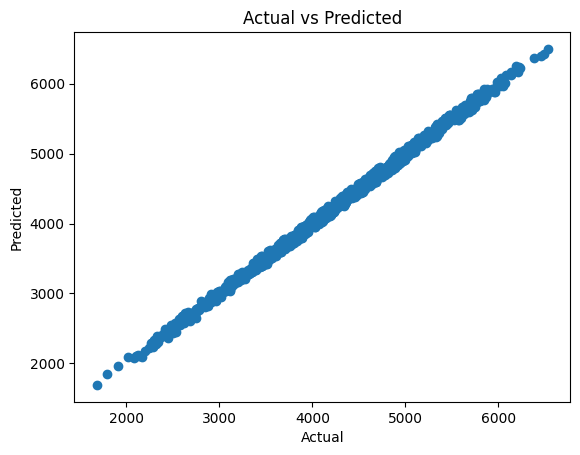

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()